In [1]:
import pandas as pd
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import data
df_og = pd.read_csv(r'../data/processed/Cargo Theft 2020.csv')
df_og

,Year-Quarter,Day,Date,City,State,"City, ST",Country,Commodity,Value,Type of Loss,Location,Additional Information,Recovery?,Time,General Category
0,2020-Q1,Wednesday,1/1/20,Garland,TX,"Garland, TX",USA,Motor oil,100000.0,Cargo theft,Secure yard,No additional details,NaN,Overnight,Automobile & Parts
1,2020-Q1,Wednesday,1/1/20,Memphis,TN,"Memphis, TN",USA,Gas cylinders,10000.0,Pilferage,Truck stop/Gas station,No additional details,NaN,Overnight,Construction & Industrial goods
2,2020-Q1,Wednesday,1/1/20,Ocala,FL,"Ocala, FL",USA,Televisions,137000.0,Cargo theft,Secure yard,No additional details,NaN,Overnight,Consumer electronics
3,2020-Q1,Wednesday,1/1/20,South Holland,IL,"South Holland, IL",USA,Cell phones,100000.0,Cargo theft,Truck stop/Gas station,East Tollway,NaN,NaN,Consumer electronics
4,2020-Q1,Friday,1/3/20,Zion,IL,"Zion, IL",USA,Mixed goods,NaN,Seal break,Truck stop/Gas station,Russel Rd,No loss,Overnight,Mixed cargo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478,2020-Q3,Sunday,8/30/20,NaN,TN,", TN",USA,Soft drinks,NaN,Cargo theft,Unspecified,No additional details,NaN,NaN,Food & Drinks
479,2020-Q3,Sunday,8/30/20,NaN,TX,", TX",USA,Tires,NaN,Cargo theft,Unspecified,17 & 19 inch,NaN,NaN,Automobile & Parts
480,2020-Q3,Tuesday,9/1/20,NaN,TX,", TX",USA,Tools,NaN,Pilferage,Truck stop/Gas station,No additional details,NaN,NaN,Construction & Industrial goods
481,2020-Q3,Tuesday,9/1/20,NaN,ON,", ON",CAN,Mixed cargo,NaN,Pilferage,Truck stop/Gas station,No additional details,NaN,NaN,Mixed cargo


In [3]:
# copy df
df = df_og.copy()

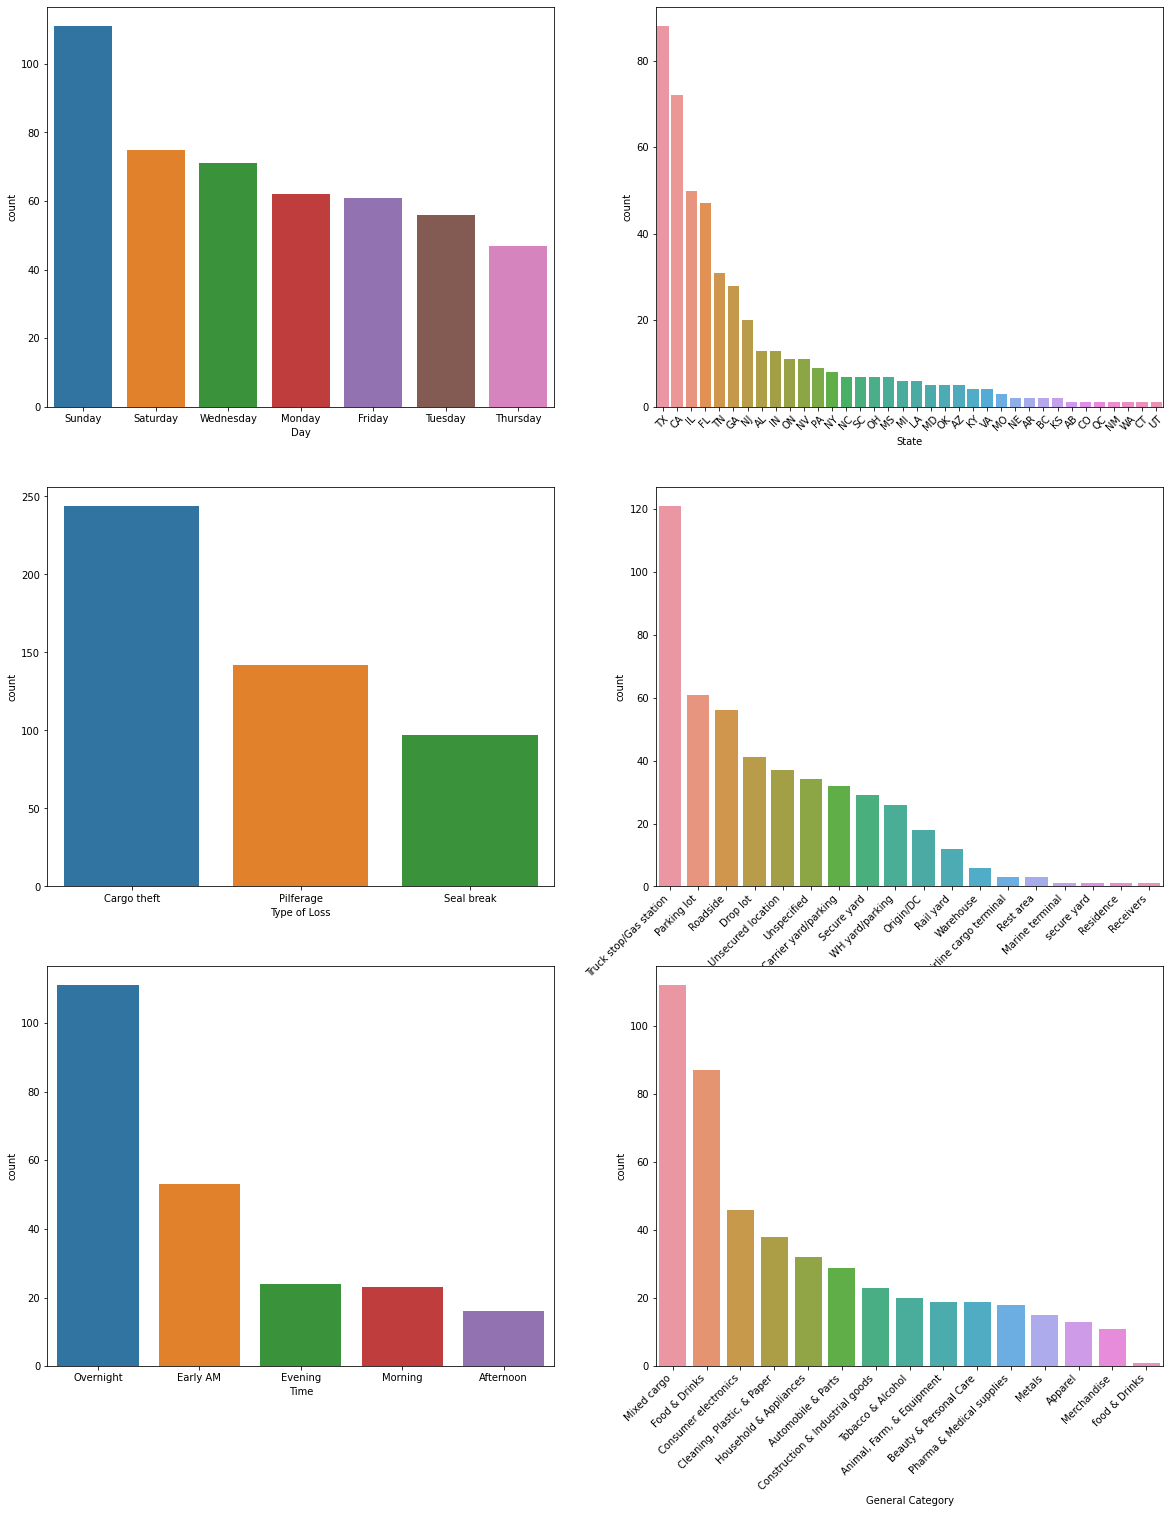

In [35]:
# data overview
fig, [[ax1, ax2],[ax3, ax4], [ax5, ax6]] = plt.subplots(3,2,figsize=(20,25))

sns.countplot(x='Day', data=df, order = df['Day'].value_counts().index, ax=ax1)
sns.countplot(x='State', data=df, order = df['State'].value_counts().index, ax=ax2).set_xticklabels(df['State'].value_counts().index, rotation=45)

sns.countplot(x='Type of Loss', data=df, order = df['Type of Loss'].value_counts().index, ax=ax3)
sns.countplot(x='Location', data=df, order = df['Location'].value_counts().index, ax=ax4).set_xticklabels(df['Location'].value_counts().index, rotation=45, horizontalalignment='right')

sns.countplot(x='Time', data=df, order = df['Time'].value_counts().index, ax=ax5)
sns.countplot(x='General Category', data=df, order = df['General Category'].value_counts().index, ax=ax6).set_xticklabels(df['General Category'].value_counts().index, rotation=45, horizontalalignment='right');

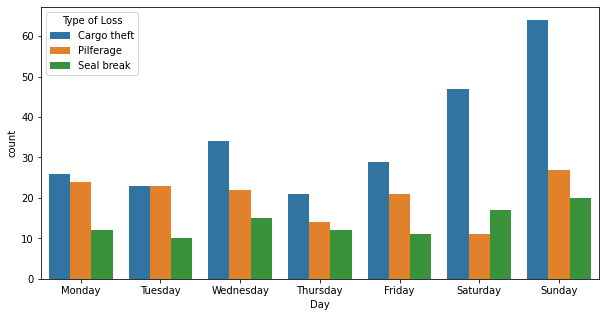

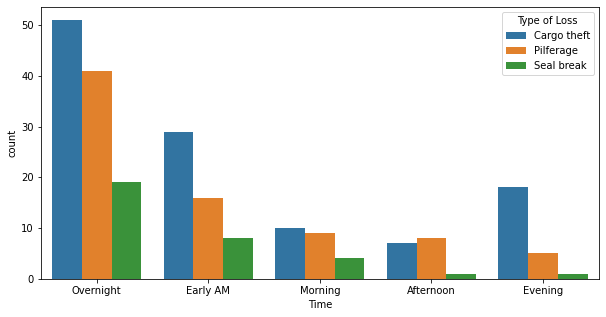

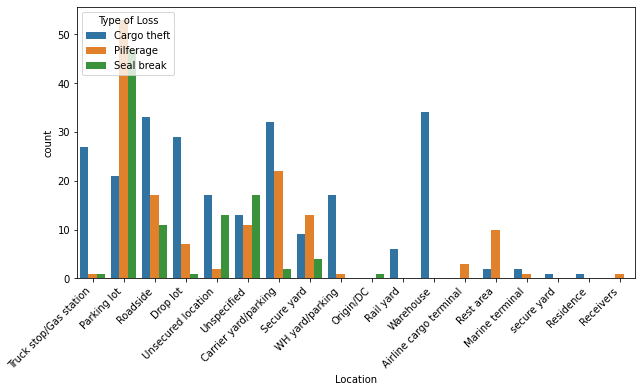

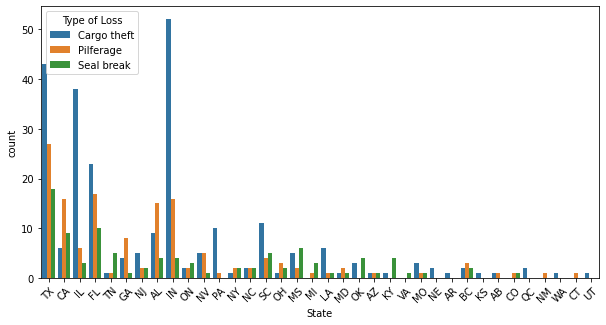

In [36]:
# type of loss v.s. time
# group by weekdays & type of loss
fig, ax = plt.subplots(figsize=(10,5))
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sns.countplot(data=df, x = 'Day', hue = 'Type of Loss', order = weekdays)

# group by time & type of loss
fig, ax = plt.subplots(figsize=(10,5))
time = ['Overnight','Early AM', 'Morning', 'Afternoon', 'Evening']
sns.countplot(data=df, x = 'Time', hue = 'Type of Loss', order = time)


# type of loss v.s. places
# group by location & type of loss
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=df, x = 'Location', hue = 'Type of Loss').set_xticklabels(df['Location'].value_counts().index, rotation=45, horizontalalignment='right')


# group by states & type of loss
fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(data=df, x = 'State', hue = 'Type of Loss').set_xticklabels(df['State'].value_counts().index, rotation=45);


In [37]:
# value: make sure data type is float 
df['Value'] = df['Value'].astype(float)

In [38]:
# encoding
df['Day'] =df['Day'].astype('category').cat.codes
df['General Category'] =df['General Category'].astype('category').cat.codes
df['Location'] =df['Location'].astype('category').cat.codes
df['Type of Loss'] =df['Type of Loss'].astype('category').cat.codes
df['Time'] =df['Time'].astype('category').cat.codes

                       Day  General Category  Location  Type of Loss  \
Day               1.000000         -0.005276 -0.035280      0.023338   
General Category -0.005276          1.000000 -0.062604      0.340288   
Location         -0.035280         -0.062604  1.000000     -0.079648   
Type of Loss      0.023338          0.340288 -0.079648      1.000000   
Time              0.001754         -0.206641 -0.018692     -0.034102   
Value            -0.005200          0.012390  0.016619     -0.139682   

                      Time     Value  
Day               0.001754 -0.005200  
General Category -0.206641  0.012390  
Location         -0.018692  0.016619  
Type of Loss     -0.034102 -0.139682  
Time              1.000000  0.015985  
Value             0.015985  1.000000  


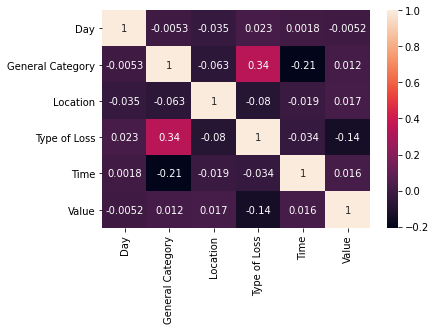

In [39]:
# correlation
# get df column to calculate corr
df_new = df[['Day', 'General Category', 'Location', 'Type of Loss', 'Time', 'Value']]

corrMatrix  = df_new.corr()
print(corrMatrix)

# plot corr
sns.heatmap(corrMatrix, annot=True)
plt.show()